In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


## iPhone data EDA

In [3]:
iphone_df = pd.read_csv('iphone.csv')

In [5]:
iphone_df.sample(10)

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
3033,B09G9D8KRQ,India,19-08-2024,True,1,Old mobile delivered,Mobile is hanging,https://www.amazon.in/gp/customer-reviews/R2O6...,Reviewed in India on 19 August 2024,Colour: BlueSize: 128 GB,B09G9BL5CP
2187,B09G9D8KRQ,India,05-08-2024,True,2,Battery heating problem,While charging too much battery heating proble...,https://www.amazon.in/gp/customer-reviews/R2IG...,Reviewed in India on 5 August 2024,Colour: GreenSize: 128 GB,B09V4B6K53
2336,B09G9D8KRQ,India,28-09-2021,True,5,Great experience ..,It’s a great upgrade…camera is good..,https://www.amazon.in/gp/customer-reviews/R36G...,Reviewed in India on 28 September 2021,Colour: MidnightSize: 256 GB,B09G9BQS98
1105,B0BDK8LKPJ,India,12-05-2024,True,2,Overheating,"Getting overheat, while on call, also whike us...",https://www.amazon.in/gp/customer-reviews/R2YF...,Reviewed in India on 12 May 2024,Colour: BlueSize: 128 GB,B0BDK62PDX
2599,B09G9D8KRQ,India,26-08-2023,True,1,Not good don't like,I Phone 13 is very heating problems.. within 2...,https://www.amazon.in/gp/customer-reviews/R3B2...,Reviewed in India on 26 August 2023,Colour: PinkSize: 128 GB,B09G9FPGTN
764,B09G9J5JZX,United Arab Emirates,10-12-2021,False,4,great phone,not worth it though,https://www.amazon.ae/gp/customer-reviews/R3I3...,Reviewed in the United Arab Emirates on 10 Dec...,Size: 256 GBColour: Red,B09G9G5D68
2356,B09G9D8KRQ,India,16-09-2024,True,5,Amazing product,💕❤️❤️,https://www.amazon.in/gp/customer-reviews/R1SX...,Reviewed in India on 16 September 2024,Colour: MidnightSize: 128 GB,B09G9HD6PD
1698,B0BN72MLT2,United States,24-08-2024,True,1,Phone arrived broken,We ordered an iPhone 14 that was supposed to b...,https://www.amazon.com/gp/customer-reviews/RE0...,"Reviewed in the United States on August 24, 2024",Service Provider: T-MobileColor: MidnightSize:...,B0BN71LWF2
1859,B0BN72MLT2,Mexico,20-12-2023,True,5,Si era lo que esperaba,Recibí el producto en perfecto estado (sabiend...,NaN,"Reviewed in Mexico on December 20, 2023",Service Provider: UnlockedColor: YellowSize: 1...,B0CG7ZDWGK
1352,B0BDK8LKPJ,India,03-08-2023,False,2,Only for Show Off the Logo,Not satisfied with the product ...Samsung Mid ...,https://www.amazon.in/gp/customer-reviews/R1XY...,Reviewed in India on 3 August 2023,Colour: BlueSize: 128 GB,B0BDK62PDX


In [20]:
def Basic_info_func(X):
    
    print(f'Size of this dataset is: {len(X)}')
    
    df = pd.DataFrame()
    df['Feature'] = X.columns
    df['Missing_values'] = X.isnull().sum().values
    df['N_uniques'] = X.nunique().values  
    df['Data_type'] = X.dtypes.values.astype(str)
    df['missing_percentage'] = (X.isnull().sum().values/len(X)).round(2)
    
    
    return df.set_index('Feature')

In [21]:
Basic_info_func(iphone_df)

Size of this dataset is: 3062


,Missing_values,N_uniques,Data_type,missing_percentage
Feature,,,,
productAsin,0,7,object,0.00
country,0,7,object,0.00
date,0,789,object,0.00
isVerified,0,2,bool,0.00
ratingScore,0,5,int64,0.00
reviewTitle,0,2018,object,0.00
reviewDescription,86,2297,object,0.03
reviewUrl,16,2460,object,0.01
reviewedIn,0,1255,object,0.00


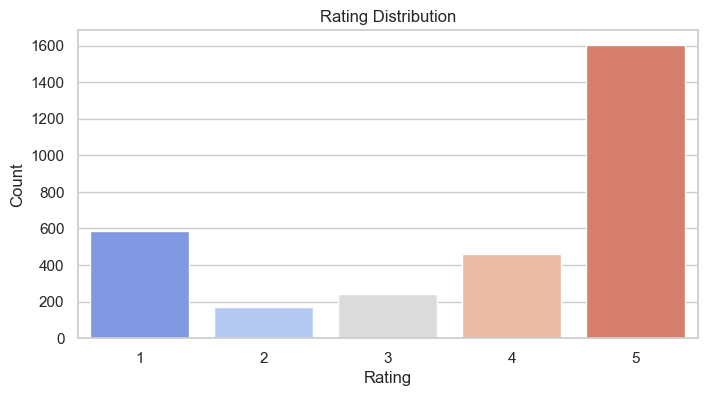

In [22]:
# Rating distribution
plt.figure(figsize=(8,4))
sns.countplot(data=iphone_df, x='ratingScore', palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


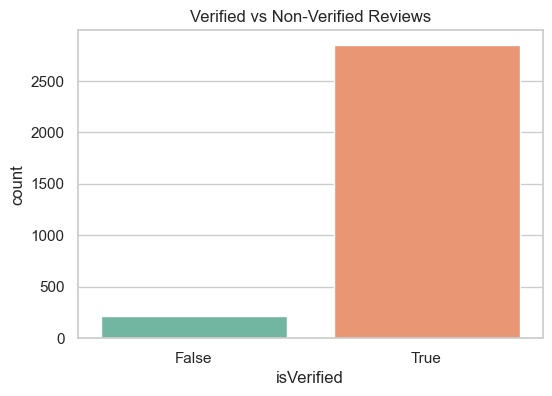

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=iphone_df, x='isVerified', palette='Set2')
plt.title('Verified vs Non-Verified Reviews')
plt.show()


In [24]:
iphone_df['date'] = pd.to_datetime(iphone_df['date'], dayfirst=True)


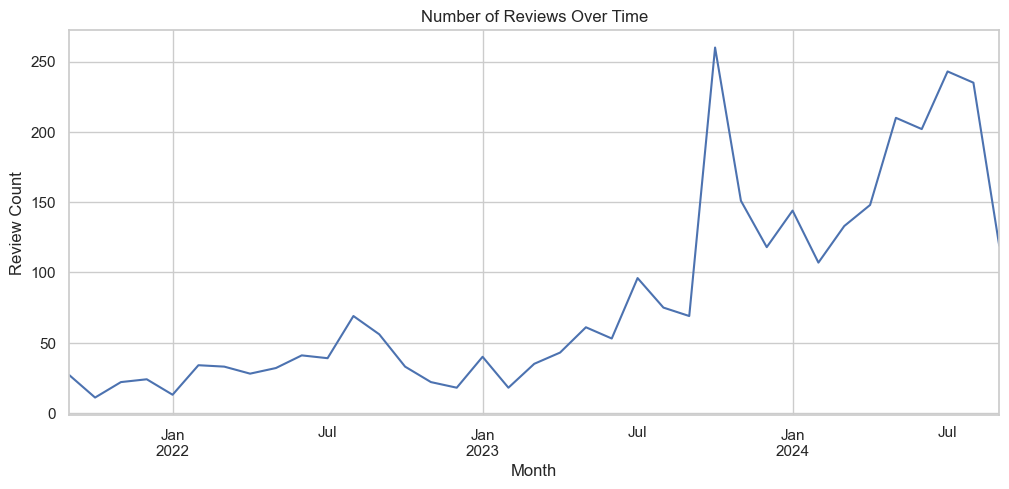

In [25]:
plt.figure(figsize=(12,5))
iphone_df.set_index('date')['ratingScore'].resample('M').count().plot()
plt.title('Number of Reviews Over Time')
plt.ylabel('Review Count')
plt.xlabel('Month')
plt.show()


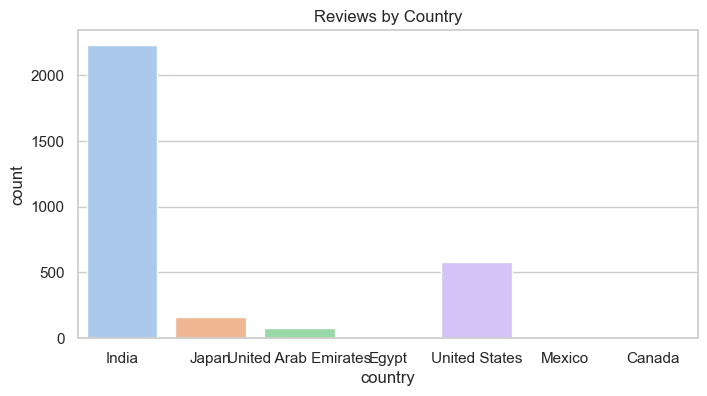

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(data=iphone_df, x='country', palette='pastel')
plt.title('Reviews by Country')
plt.show()


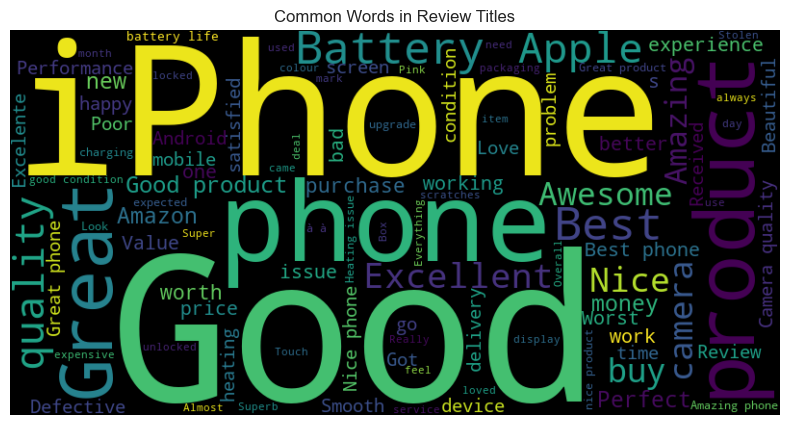

In [29]:
from collections import Counter
from wordcloud import WordCloud

# Combine all review titles
text = " ".join(title for title in iphone_df['reviewTitle'].dropna())
wordcloud = WordCloud(background_color='black', max_words=100, width=800, height=400).generate(text)

# Plot WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Review Titles")
plt.show()


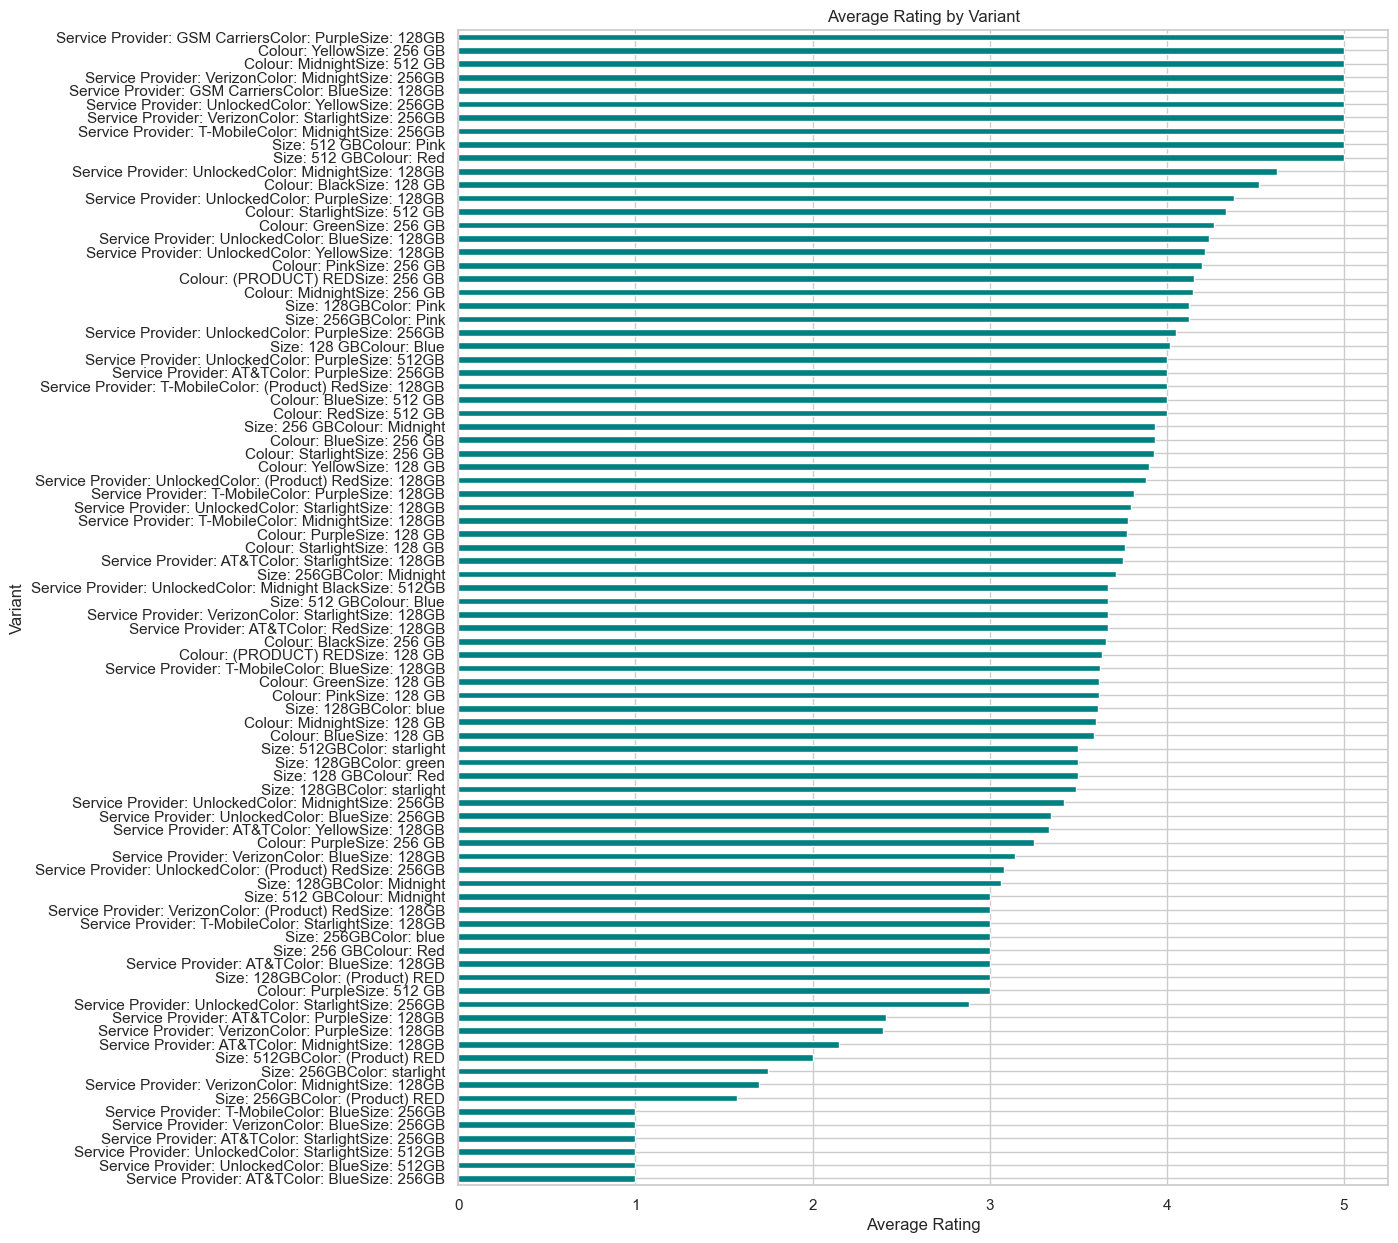

In [31]:
plt.figure(figsize=(12,15))
variant_ratings = iphone_df.groupby('variant')['ratingScore'].mean().sort_values()
variant_ratings.plot(kind='barh', color='teal')
plt.title('Average Rating by Variant')
plt.xlabel('Average Rating')
plt.ylabel('Variant')
plt.show()


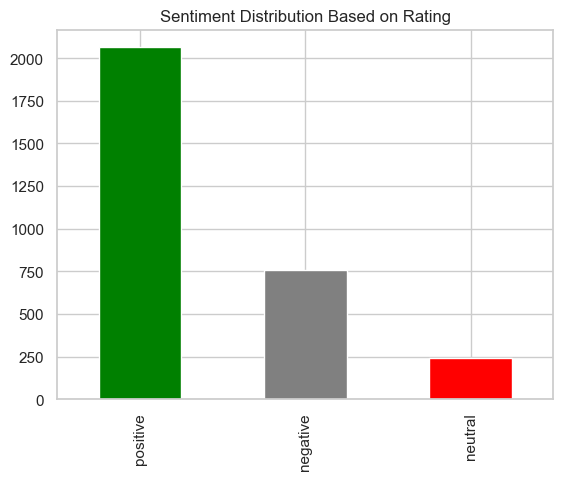

In [36]:
# Label reviews based on rating
def get_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

iphone_df['sentiment'] = iphone_df['ratingScore'].apply(get_sentiment)
iphone_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution Based on Rating')
plt.show()


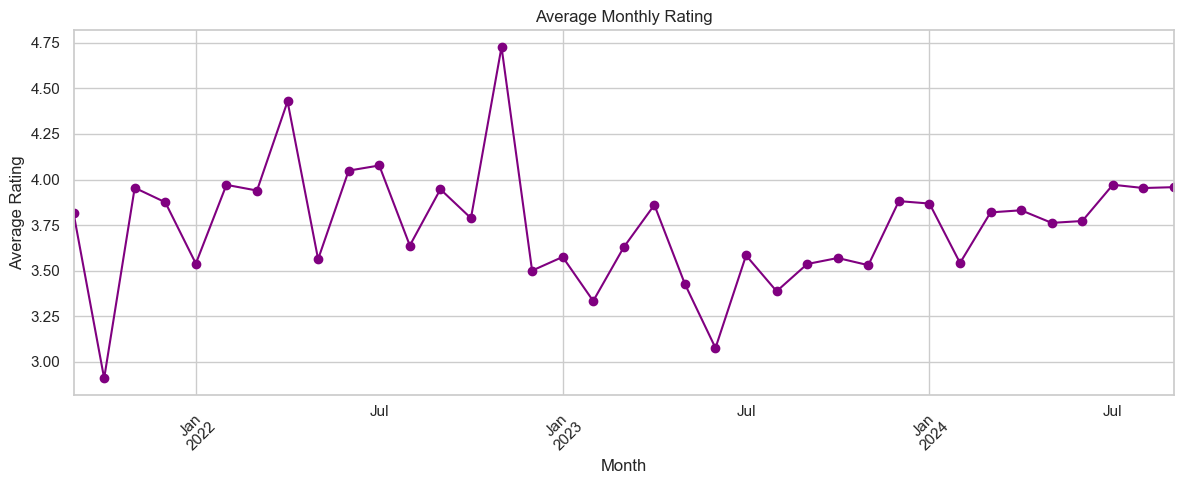

In [38]:
monthly_avg_rating = iphone_df.groupby('month')['ratingScore'].mean()

plt.figure(figsize=(12,5))
monthly_avg_rating.plot(marker='o', color='purple')
plt.title('Average Monthly Rating')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


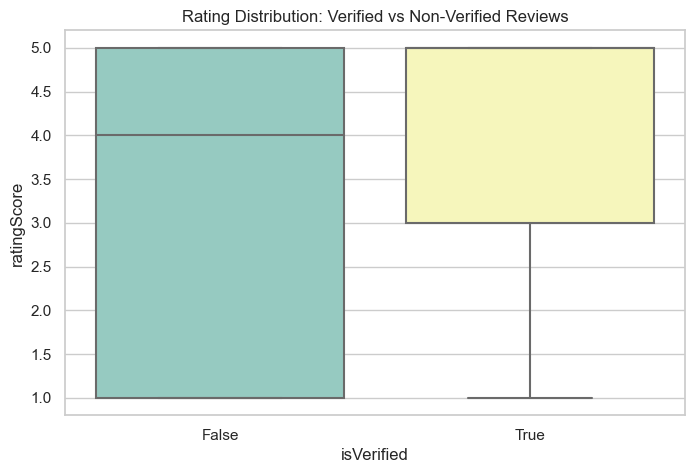

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(data=iphone_df, x='isVerified', y='ratingScore', palette='Set3')
plt.title('Rating Distribution: Verified vs Non-Verified Reviews')
plt.show()


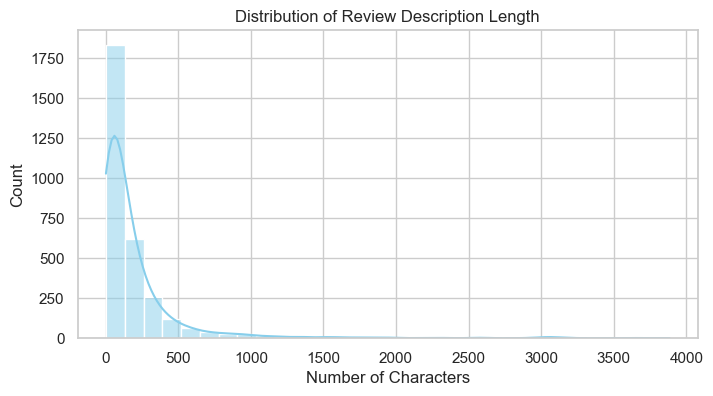

In [41]:
# Length of each review description
iphone_df['review_len'] = iphone_df['reviewDescription'].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(iphone_df['review_len'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Description Length')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()


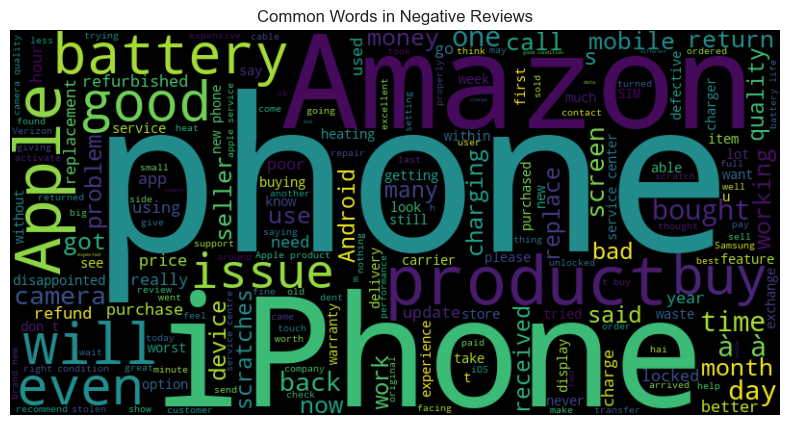

In [43]:
from wordcloud import WordCloud, STOPWORDS

# Filter negative reviews (rating ≤ 2)
negative_reviews = iphone_df[iphone_df['ratingScore'] <= 2]['reviewDescription'].dropna()
text_neg = " ".join(negative_reviews)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(text_neg)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Negative Reviews")
plt.show()


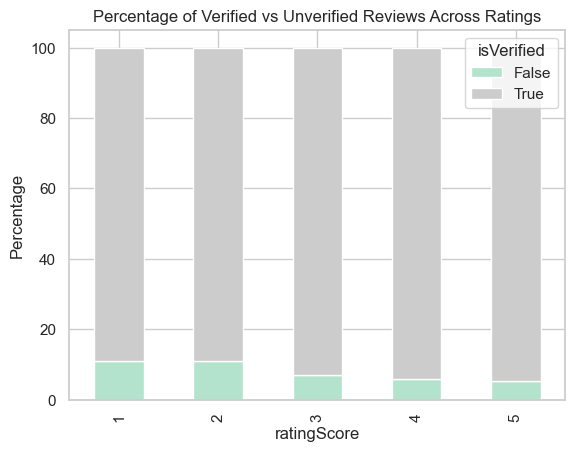

In [44]:
cross_tab = pd.crosstab(iphone_df['ratingScore'], iphone_df['isVerified'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title('Percentage of Verified vs Unverified Reviews Across Ratings')
plt.ylabel('Percentage')
plt.show()


In [48]:
!pip install -q textblob

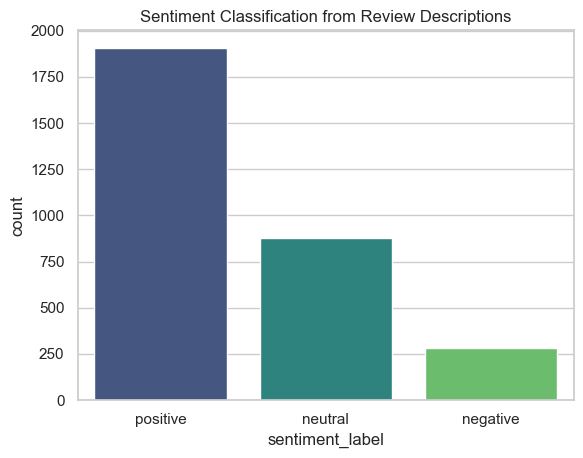

In [49]:
from textblob import TextBlob

# Apply sentiment polarity
iphone_df['polarity'] = iphone_df['reviewDescription'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Label sentiment
def get_sentiment_label(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

iphone_df['sentiment_label'] = iphone_df['polarity'].apply(get_sentiment_label)

# Countplot
sns.countplot(data=iphone_df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title('Sentiment Classification from Review Descriptions')
plt.show()


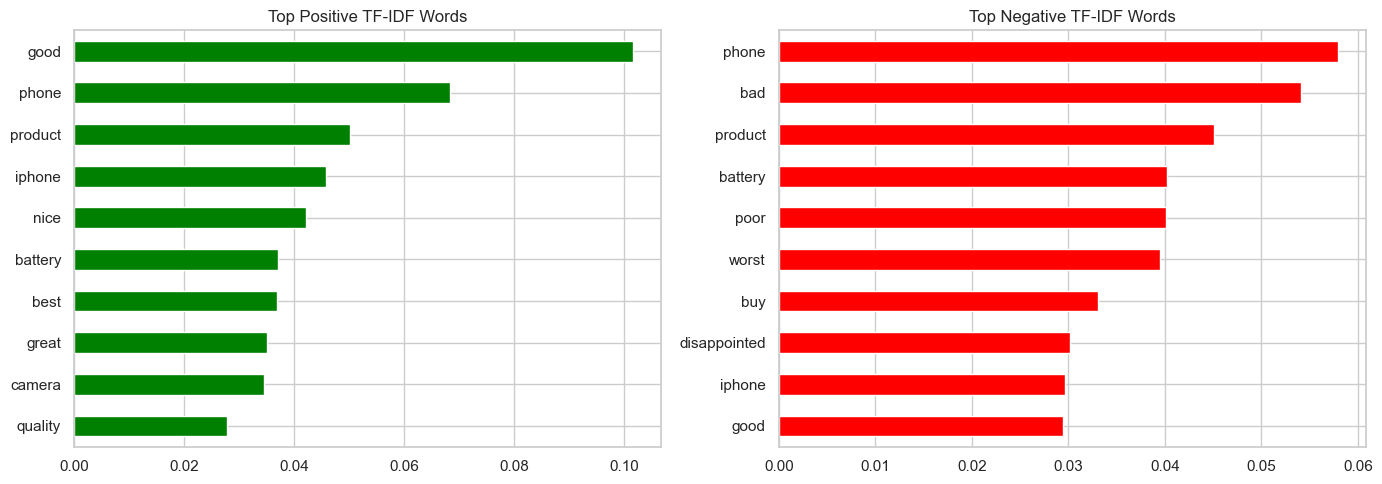

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter reviews
pos_reviews = iphone_df[iphone_df['sentiment_label'] == 'positive']['reviewDescription'].dropna()
neg_reviews = iphone_df[iphone_df['sentiment_label'] == 'negative']['reviewDescription'].dropna()

# Combine and label
all_reviews = pd.concat([pos_reviews, neg_reviews])
labels = ['positive'] * len(pos_reviews) + ['negative'] * len(neg_reviews)

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(all_reviews)

# Create dataframe
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['sentiment'] = labels

# Mean TF-IDF per word by sentiment
mean_tfidf = tfidf_df.groupby('sentiment').mean().T
top_positive = mean_tfidf['positive'].sort_values(ascending=False).head(10)
top_negative = mean_tfidf['negative'].sort_values(ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
top_positive.plot(kind='barh', ax=axes[0], color='green', title='Top Positive TF-IDF Words')
top_negative.plot(kind='barh', ax=axes[1], color='red', title='Top Negative TF-IDF Words')
axes[0].invert_yaxis(); axes[1].invert_yaxis()
plt.tight_layout()
plt.show()


## iPhone Dataset Summary and Insights

This analysis focuses on a dataset of iPhone product reviews collected from Amazon across multiple countries. It includes features like review text, ratings, verification status, country of review, and date. Below is a complete summary based on exploratory data analysis and advanced visualizations.

---

### Dataset Overview

- **Total Records:** 3000+
- **Columns:** 11
- **Missing Values:**
  - `reviewDescription`: 3% missing
  - `reviewUrl`: 1% missing
  - All other columns are complete
- **Data Types:** Mix of object, boolean, and numeric types

| Column Name         | Description                                      |
|---------------------|--------------------------------------------------|
| `productAsin`       | Unique product identifier                        |
| `country`           | Country where the review was posted              |
| `date`              | Date of the review                               |
| `isVerified`        | Indicates if the purchase was verified           |
| `ratingScore`       | Numeric rating (1–5)                             |
| `reviewTitle`       | Title of the review                              |
| `reviewDescription` | Full review text                                 |
| `reviewUrl`         | Link to the review                               |
| `reviewedIn`        | Full country + date text                         |
| `variant`           | Variant details (e.g., color, storage)           |
| `variantAsin`       | Unique ASIN for each product variant             |

---

### Key Findings from Initial EDA

#### 1. Rating Distribution
- The majority of reviews have a **rating of 5**, suggesting a generally positive reception.
- Ratings of **1 and 2** are less common, indicating relatively fewer dissatisfied customers.

#### 2. Verification Status
- **Verified reviews dominate** the dataset, contributing to over 90% of total entries.
- Verified reviews tend to be **more positive**, confirming their reliability.

#### 3. Country-wise Review Volume
- **India** is the most represented country, followed by the **United States**.
- Countries like **Japan**, **UAE**, and **Egypt** also appear but contribute fewer reviews.

#### 4. Temporal Trends
- A clear **increase in review volume over time**, peaking in mid-2024.
- This may align with product launches or seasonal sales (e.g., festive seasons).

#### 5. Sentiment Analysis
- Based on a rating-based classification:
  - **Positive sentiment (rating ≥ 4)** dominates.
  - **Negative and neutral sentiments** are relatively rare.

---

### Deeper Insights from Advanced Visuals

#### 6. Word Cloud of Review Titles
- Words like **“iPhone,” “good,” “phone,” “battery,”** and **“product”** are highly frequent.
- Indicates focus on general quality and specific features.

#### 7. Monthly Average Ratings
- Monthly ratings **fluctuate** but stay mostly positive.
- Sudden dips or spikes can indicate issues like **product defects**, **patch releases**, or **viral feedback**.

#### 8. Verified vs Unverified Ratings
- **Verified reviews consistently rate higher** than unverified ones.
- This is further confirmed by bar charts showing average scores across verification status.

#### 9. Stacked Bar of Verified Reviews per Rating
- Across all ratings, the **proportion of verified reviews is high**.
- Interestingly, even lower ratings have a significant number of verified purchases, implying **real dissatisfaction** among genuine buyers.

---

### TF-IDF Insights

#### 10. Top Words in Positive Reviews
- Common terms: **“good,” “phone,” “product,” “camera,” “quality,” “nice”**
- Customers praise aspects like performance, battery, camera, and build quality.

#### 11. Top Words in Negative Reviews
- Common terms: **“bad,” “battery,” “poor,” “worst,” “disappointed”**
- Battery and device quality are also the top **sources of negative sentiment**, showing they’re double-edged factors.

---

### Final Observations

- The product enjoys **strong approval**, especially from **verified buyers**.
- Sentiment aligns well with numeric ratings, validating the use of basic rule-based sentiment tagging.
- **Temporal and TF-IDF analysis** reveal important shifts in customer perception and highlight **core strengths and weaknesses** of the product.
- This analysis is a valuable tool for **product managers, marketers, and quality teams** to make informed decisions on product improvements, campaigns, and customer outreach.


## Twitter dataset EDA

In [60]:
twitter_df = pd.read_csv('twitter_validation.csv')

twitter_df.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [66]:
twitter_df = pd.read_csv('twitter_validation.csv', header=None)
twitter_df.columns = ['group_id', 'topic', 'label', 'text']
twitter_df.sample(10)

,group_id,topic,label,text
54069,2089,CallOfDuty,Negative,this shit again …
25272,4738,Google,Positive,The best part of the quarter is inputting all ...
25088,4707,Google,Irrelevant,My album of comfort.
32761,6422,Fortnite,Irrelevant,The Fishman... Hello! I made this fan art of L...
5968,227,Amazon,Positive,amzn. is to / 2yN3aSV The Best selling website...
12625,8570,NBA2K,Negative,Aye why @ NBA2K _ MyTEAM give @ mikal _ bridge...
64356,7826,MaddenNFL,Negative,@EASPORTS_MUT @EAMaddenNFL . My 10 hours just ...
32066,7503,LeagueOfLegends,Positive,Glassymble: You spent about 878 hours on Leagu...
65475,6812,johnson&johnson,Positive,RhandlerR Johnson & Johnson makes perfect sens...
8840,9516,Overwatch,Positive,I miss Overwatch and am excited to try Valorant!


In [65]:
Basic_info_func(twitter_df)

Size of this dataset is: 74682


,Missing_values,N_uniques,Data_type,missing_percentage
Feature,,,,
group_id,0,12447,int64,0.00
topic,0,32,object,0.00
label,0,4,object,0.00
text,686,69491,object,0.01


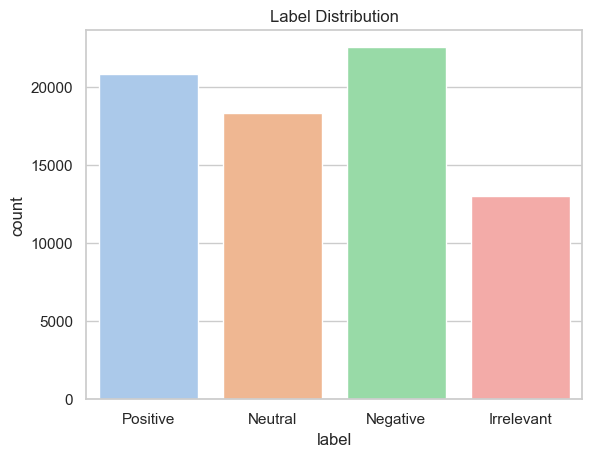

Negative      30.18%
Positive      27.89%
Neutral       24.53%
Irrelevant    17.39%
Name: label, dtype: object


In [74]:
sns.countplot(data=twitter_df, x='label', palette='pastel')
plt.title('Label Distribution')
plt.show()

print(df['label'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))


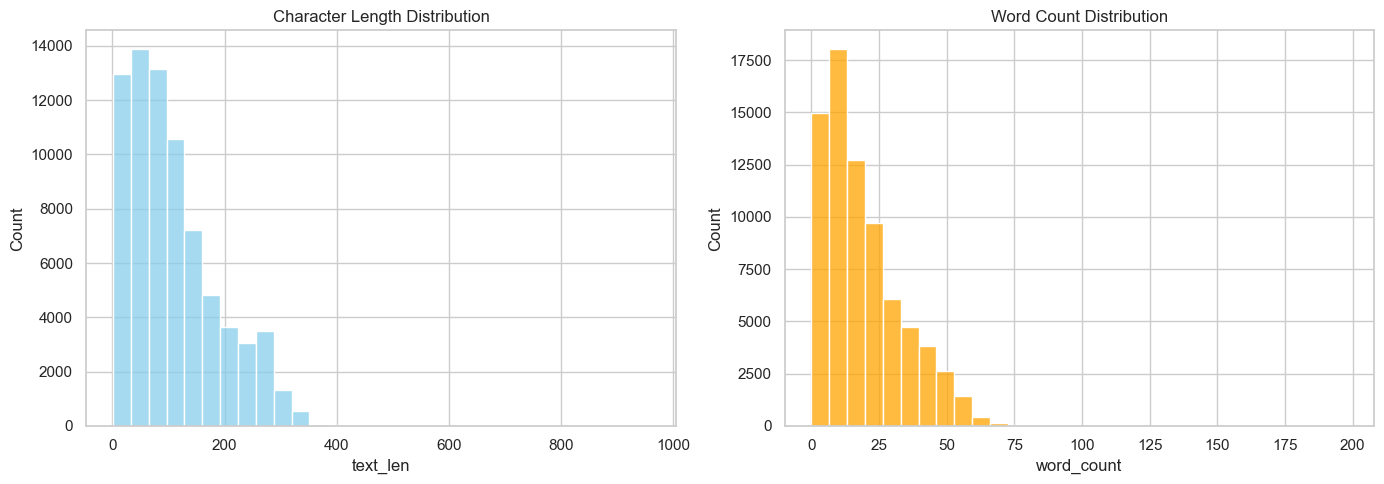

In [75]:
# Add sentence length column
twitter_df['text_len'] = twitter_df['text'].astype(str).apply(len)
twitter_df['word_count'] = twitter_df['text'].astype(str).apply(lambda x: len(x.split()))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['text_len'], bins=30, ax=axs[0], color='skyblue')
axs[0].set_title('Character Length Distribution')
sns.histplot(df['word_count'], bins=30, ax=axs[1], color='orange')
axs[1].set_title('Word Count Distribution')
plt.tight_layout()
plt.show()


Top 10 Words: [('game', 8062), ('im', 4942), ('now', 4094), ('2', 4070), ('one', 3584), ('good', 3550), ('play', 3413), ('will', 3315), ('really', 3260), ('love', 3239)]


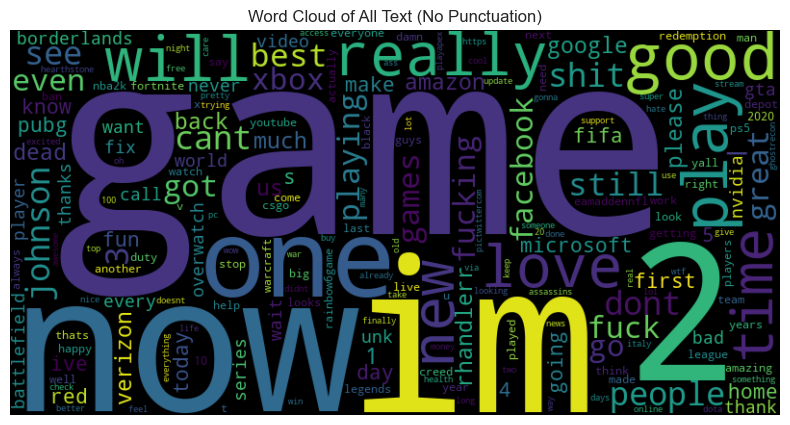

In [77]:
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text
all_text = ' '.join(df['text'].dropna().astype(str).tolist()).lower()

# Remove punctuation using regex
all_text = re.sub(r'[^\w\s]', '', all_text)

# Tokenize and count (excluding stopwords)
words = [word for word in all_text.split() if word not in STOPWORDS]
word_freq = Counter(words)

# Show top 10
print("Top 10 Words:", word_freq.most_common(10))

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Text (No Punctuation)")
plt.show()



Top 5 Most Common Paraphrase Groups:
 2401    6
2448    6
2424    6
2412    6
2403    6
Name: group_id, dtype: int64


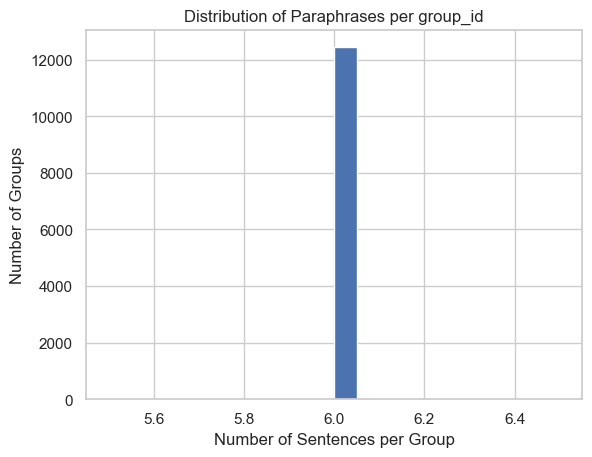

In [72]:
group_counts = df['group_id'].value_counts().sort_values(ascending=False)
print("\nTop 5 Most Common Paraphrase Groups:\n", group_counts.head())

# Plot
group_counts.hist(bins=20)
plt.title("Distribution of Paraphrases per group_id")
plt.xlabel("Number of Sentences per Group")
plt.ylabel("Number of Groups")
plt.show()


In [73]:
dup_count = df.duplicated(subset='text').sum()
print(f"Number of duplicated texts: {dup_count}")

Optional: drop duplicates
df = df.drop_duplicates(subset='text')


Number of duplicated texts: 5190


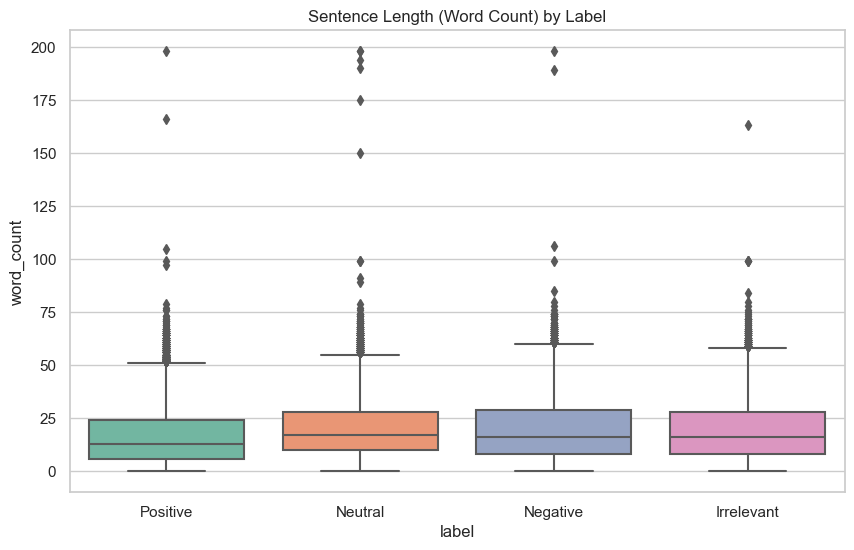

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='word_count', data=df, palette='Set2')
plt.title("Sentence Length (Word Count) by Label")
plt.show()


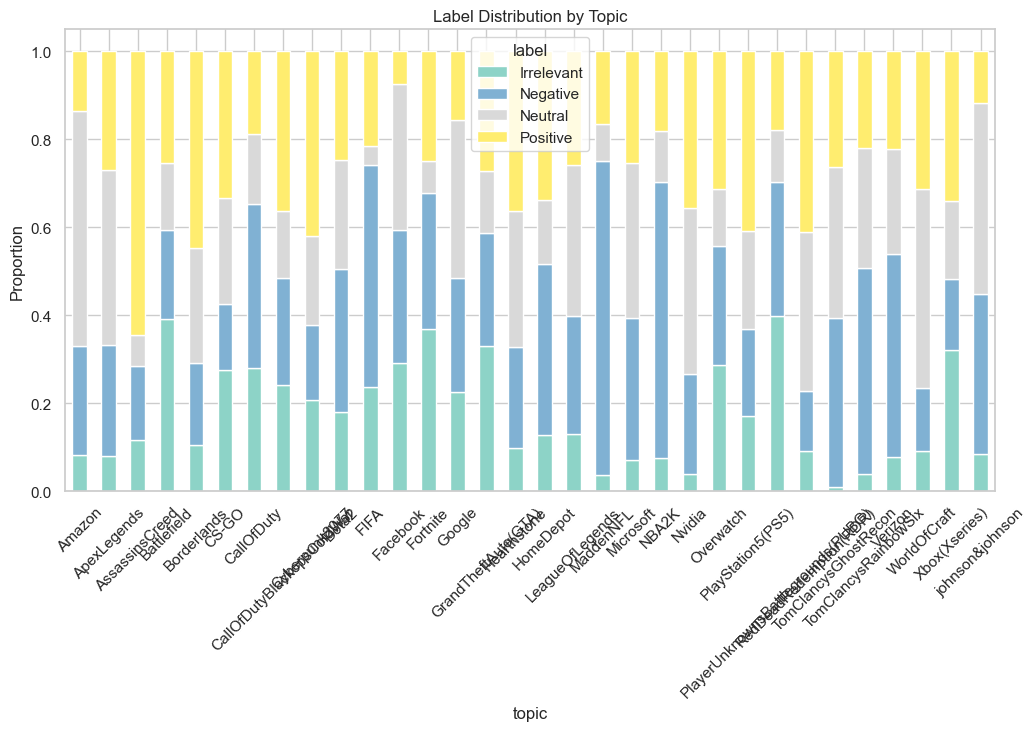

In [79]:
if df['topic'].nunique() > 1:
    topic_dist = df.groupby('topic')['label'].value_counts(normalize=True).unstack().fillna(0)
    topic_dist.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
    plt.title('Label Distribution by Topic')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()


In [81]:
!pip install -q sentence_transformers

Most common starting phrases:
[('nan', 686), ('Johnson & Johnson', 462), ('Red Dead Redemption', 187), ('A ban for', 183), ('It is not', 175), ('At the same', 174), ('', 172), ('I just earned', 164), ('<unk>', 133), ('Check out this', 80)]


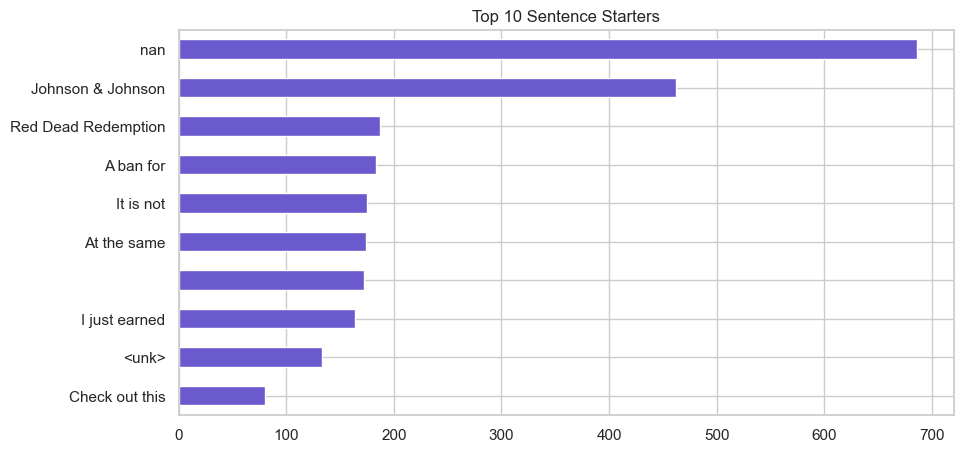

In [83]:
from collections import Counter

# Extract first 2-3 words
df['start_phrase'] = df['text'].astype(str).apply(lambda x: ' '.join(x.split()[:3]))
start_counts = Counter(df['start_phrase'])

# Top 10
print("Most common starting phrases:")
print(start_counts.most_common(10))

# Plot
pd.Series(start_counts).nlargest(10).plot(kind='barh', color='slateblue', figsize=(10,5))
plt.title('Top 10 Sentence Starters')
plt.gca().invert_yaxis()
plt.show()


## Twitter Dataset Analysis Summary

This dataset contains over 74,000 tweets grouped into paraphrased clusters, each assigned a topic and sentiment label. It is structured to support tasks like sentiment analysis, paraphrase detection, and topic classification.


### Dataset Overview

- **Total Records:** 74,682 tweets
- **Missing Text Values:** 686 rows (~0.01%) — negligible and easily handled via imputation or removal.
- **Unique Groups (`group_id`):** 12,447 clusters of paraphrased tweets
- **Unique Topics:** 32 topics such as Borderlands, CallOfDuty, Google, NBA2K, LeagueOfLegends, Amazon, Fortnite, etc.
- **Sentiment Labels:** 4 categories — Positive, Negative, Neutral, Irrelevant

| Feature      | Missing Values | Unique Values | Data Type | Missing % |
|--------------|----------------|----------------|------------|------------|
| `group_id`   | 0              | 12447          | int64      | 0.00%      |
| `topic`      | 0              | 32             | object     | 0.00%      |
| `label`      | 0              | 4              | object     | 0.00%      |
| `text`       | 686            | 69491          | object     | 0.01%      |



### Key Insights from Visualizations

#### 1. Label Distribution by Topic
- The majority of tweets are either Positive or Negative, depending on the topic.
- Games like NBA2K, MaddenNFL, and CallOfDuty have a higher proportion of Negative sentiment.
- Tech and healthcare brands like Google and Johnson & Johnson tend to have more Positive tweets.

#### 2. Top Sentence Starters
- Many tweets begin with similar phrases due to paraphrased structure.
- Frequent starters include “I just earned”, “Check out this”, “It is not”, “Red Dead Redemption”, and others.
- Some text fields contain missing or unknown tokens such as `<unk>` or `nan`.

#### 3. Paraphrase Distribution per Group
- Almost all paraphrase groups have exactly 6 variations, indicating a clean and consistent structure.

#### 4. Overall Label Distribution
- Positive: 27.65%
- Negative: 30.18%
- Neutral: 24.53%
- Irrelevant: 17.39%
- Balanced distribution supports robust multi-class classification.

#### 5. Sentence Length by Label
- Most tweets fall in the 10–30 word range.
- Irrelevant tweets are slightly shorter in general, while Positive and Negative tweets are longer and more variable.
- Some outliers contain up to 200 words.

#### 6. Text Length Distribution
- Character Length: Most tweets range from 100 to 200 characters; longest around 800.
- Word Count: Majority of tweets have 10–25 words.



### Noteworthy Observations

- Tweets about games like Borderlands often use aggressive expressions yet are labeled Positive, suggesting contextual slang or sarcasm.
- The paraphrased nature of the data is ideal for training semantic similarity or text generation models.
- Sentence length and starting phrases reflect high paraphrase quality, useful for style variation and data augmentation.



### Final Remarks

This Twitter dataset offers a well-balanced mix of topics, sentiments, and structured paraphrases. It is highly suitable for:

- Sentiment classification (4-way or simplified 3-way)
- Paraphrase detection and semantic similarity tasks
- Sequence labeling and feature-based NLP tasks
- Contrastive learning and transformer model fine-tuning

